In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [2]:
df_2018 = pd.read_csv("/content/2018.csv")
df_2019 = pd.read_csv("/content/2019.csv")

print(df_2018.head())
print(df_2019.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                

In [6]:
print(df_2018.info())
print(df_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------     

In [8]:
df = (pd.concat([df_2018, df_2019]).groupby("Country or region").mean(numeric_only=True).reset_index())
print(df.head())


  Country or region  Overall rank   Score  GDP per capita  Social support  \
0       Afghanistan         149.5  3.4175          0.3410          0.5270   
1           Albania         109.5  4.6525          0.9315          0.8325   
2           Algeria          86.0  5.2530          0.9905          1.1570   
3            Angola         142.0  3.7950          0.7300          1.1250   
4         Argentina          38.0  6.2370          1.0825          1.4500   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   0.3080                        0.0425      0.1745   
1                   0.8320                        0.4010      0.1635   
2                   0.7360                        0.0815      0.0640   
3                   0.2690                        0.0000      0.0790   
4                   0.8125                        0.5205      0.0640   

   Perceptions of corruption  
0                     0.0305  
1                     0.0295  
2          

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             160 non-null    object 
 1   Overall rank                  160 non-null    float64
 2   Score                         160 non-null    float64
 3   GDP per capita                160 non-null    float64
 4   Social support                160 non-null    float64
 5   Healthy life expectancy       160 non-null    float64
 6   Freedom to make life choices  160 non-null    float64
 7   Generosity                    160 non-null    float64
 8   Perceptions of corruption     160 non-null    float64
dtypes: float64(8), object(1)
memory usage: 11.4+ KB


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,79.343750,5.372500,0.892956,1.208387,0.655753,0.419778,0.182641,0.110919
std,45.018277,1.109938,0.392695,0.296900,0.246246,0.153292,0.095577,0.093398
min,1.000000,3.053500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.750000,4.476625,0.604125,1.050125,0.479250,0.337250,0.112250,0.051375
50%,79.250000,5.370000,0.948500,1.242500,0.719500,0.444750,0.176000,0.084750
75%,120.250000,6.152125,1.207750,1.456625,0.831250,0.532125,0.243250,0.136875
max,155.000000,7.700500,1.799500,1.634000,1.076000,0.677500,0.582000,0.455000


In [10]:
df.isnull().sum()

,0
Country or region,0
Overall rank,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


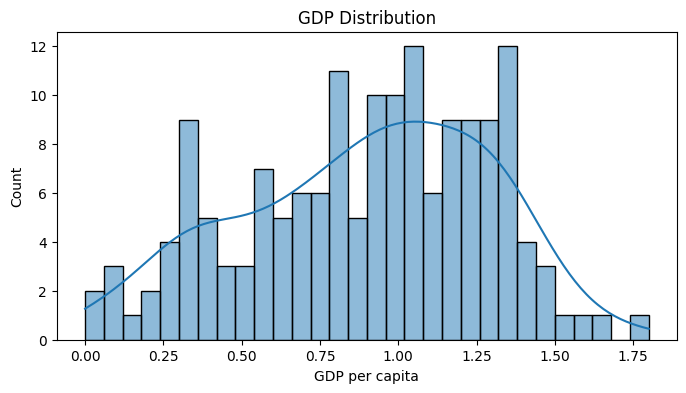

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df["GDP per capita"], bins=30, kde=True)
plt.title("GDP Distribution")
plt.show()

In [14]:
features = [
    "GDP per capita",
    "Healthy life expectancy",
    "Social support",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "Score"
]

data = df[features]


In [15]:
data.fillna(data.median(), inplace=True)

/tmp/ipython-input-421635383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(), inplace=True)


In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [17]:
linked = linkage(data_scaled, method="ward")

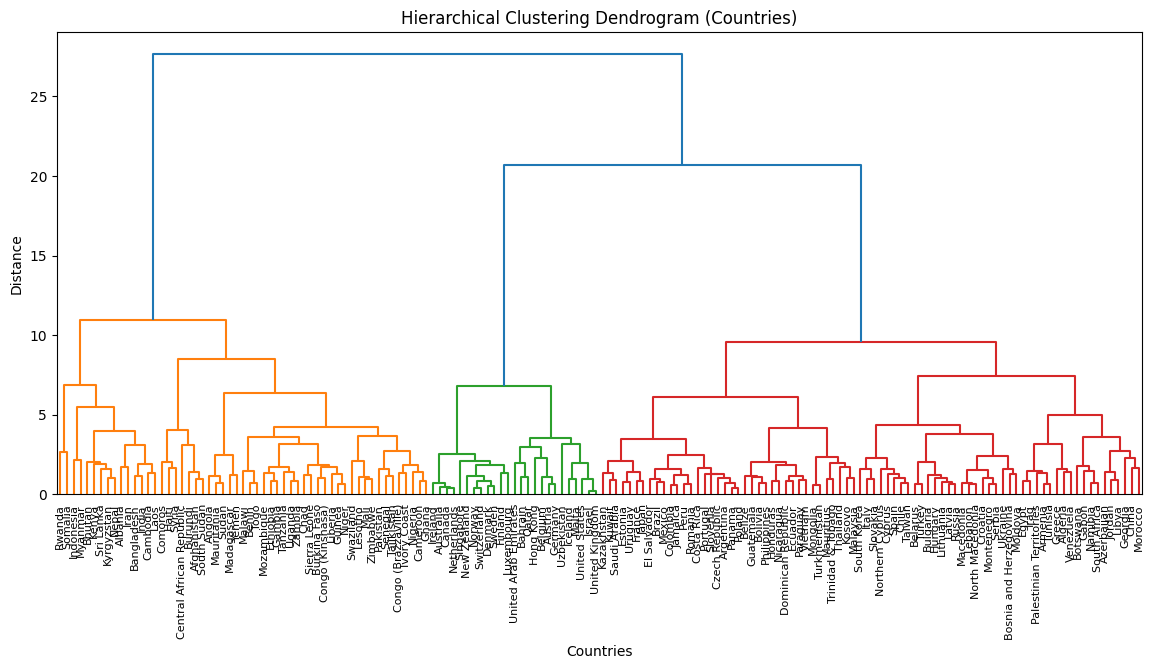

In [21]:
plt.figure(figsize=(14, 6))
dendrogram(
    linked,
    labels=df["Country or region"].values,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title("Hierarchical Clustering Dendrogram (Countries)")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)

df["Cluster"] = hc.fit_predict(data_scaled)

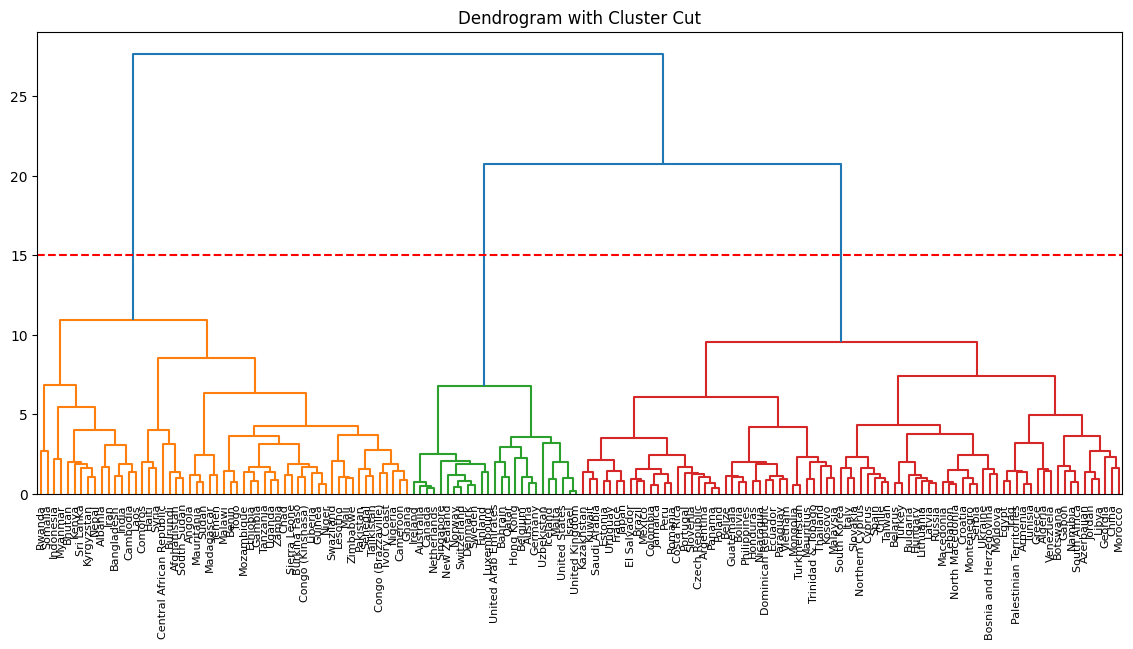

In [27]:
plt.figure(figsize=(14, 6))
dendrogram(
    linked,
    labels=df["Country or region"].values,
    leaf_rotation=90,
    leaf_font_size=8
)

plt.axhline(y=15, color='r', linestyle='--')
plt.title("Dendrogram with Cluster Cut")
plt.show()

In [28]:
hc = AgglomerativeClustering(
    distance_threshold=15,
    n_clusters=None,
    linkage="ward"
)

df["Cluster"] = hc.fit_predict(data_scaled)
df["Cluster"].nunique()

3

In [31]:
cluster_model = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)

clusters = cluster_model.fit_predict(data_scaled)
df["Cluster"] = clusters

In [32]:
cluster_summary = df.groupby("Cluster")[features].mean()
print(cluster_summary)

         GDP per capita  Healthy life expectancy  Social support  \
Cluster                                                            
0              0.465791                 0.393409        0.923636   
1              1.032981                 0.751981        1.318150   
2              1.384640                 0.924980        1.483600   

         Freedom to make life choices  Generosity  Perceptions of corruption  \
Cluster                                                                        
0                            0.359109    0.220236                   0.096300   
1                            0.412713    0.127037                   0.071644   
2                            0.575860    0.277860                   0.268760   

            Score  
Cluster            
0        4.283445  
1        5.619631  
2        6.977600  


In [33]:
cluster_names = {
    0: "Developing Countries",
    1: "Developed Countries",
    2: "Underdeveloped Countries"
}

df["Development_Level"] = df["Cluster"].map(cluster_names)

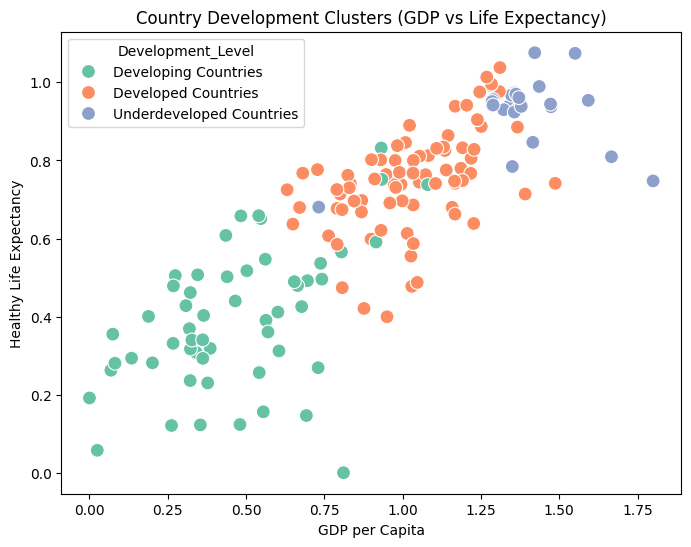

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="GDP per capita",
    y="Healthy life expectancy",
    hue="Development_Level",
    data=df,
    palette="Set2",
    s=100
)
plt.title("Country Development Clusters (GDP vs Life Expectancy)")
plt.xlabel("GDP per Capita")
plt.ylabel("Healthy Life Expectancy")
plt.show()


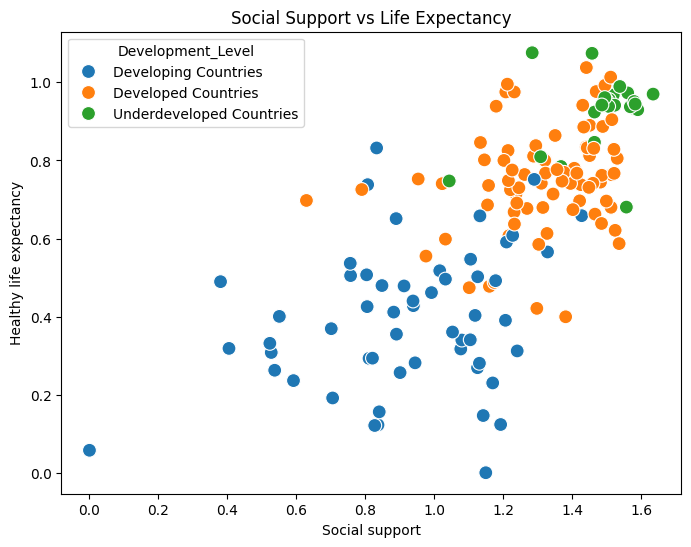

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Social support",
    y="Healthy life expectancy",
    hue="Development_Level",
    data=df,
    s=100
)
plt.title("Social Support vs Life Expectancy")
plt.show()

/tmp/ipython-input-1937576993.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


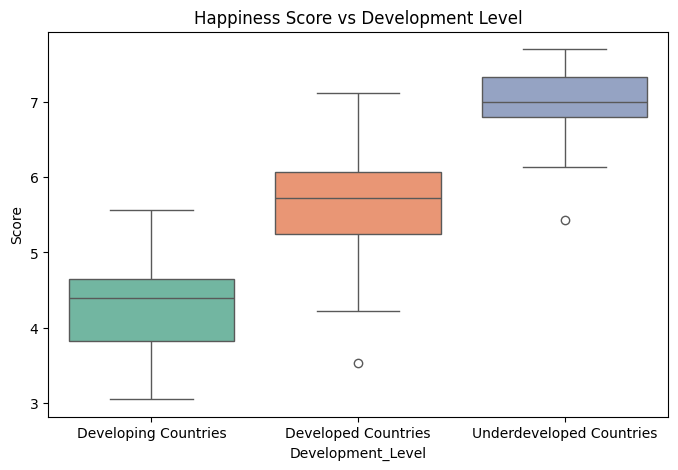

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Development_Level",
    y="Score",
    data=df,
    palette="Set2"
)
plt.title("Happiness Score vs Development Level")
plt.show()